In [7]:
import numpy as np
import pandas as pd
import csv
import random
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
subject_num = 60
def read_data(n):  #read behavioral data; no action: action[i]=4
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    comparision = [] #r-r_b; 1:>=0, 0:<0
    
    subject = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50,
               51,52,53,54,55,56,58,59,60,61]
    
    num = str(100+subject[n])
    file = pd.read_csv('E:/multi-bandit/e1_new/RL_E1_preexp1_alldata/' + num + '.csv')
    name = 'sub (' +str(n) +').csv'
    action_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    for i in range((file.shape[0])):

        if file.iloc[i,0] == 1 and file.iloc[i,action_index]!='None' :
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            if int(file.iloc[i,reward_index]) >= int(file.iloc[i,reward_index+1]):
                comparision.append(int(file.iloc[i,reward_index])-int(file.iloc[i,reward_index+1]))
            else:
                comparision.append(int(file.iloc[i,reward_index+1])-int(file.iloc[i,reward_index]))
        elif file.iloc[i,0] == 1 and file.iloc[i,action_index] =='None' :
            action.append(4)
            reward.append(0)
            reward_B.append(0)
            comparision.append(0)
    return action,reward,reward_B,comparision

def read_data_happiness(n):  #read behavioral data; no action: action[i]=4
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    happiness = [] #r-r_b; 1:>=0, 0:<0
    subject = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50,
               51,52,53,54,55,56,58,59,60,61]
    num = str(100+subject[n])
    file = pd.read_csv('E:/multi-bandit/e1_new/RL_E1_preexp1_alldata/' + num + '.csv')
    action_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    happiness_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'slider.response':
            happiness_index = i
    
    for i in range((file.shape[0])):
        if file.iloc[i,0] == 1 and file.iloc[i,action_index]!='None' :
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            happiness.append(int(float(file.iloc[i,happiness_index])))
    return action,reward,reward_B,happiness

def happiness_reward():
    subjects = 60
    trials = 150
    Reward = []
    Reward_b = []
    Happiness = []
    for s in range(subjects):
        action,reward,reward_B,happiness = read_data_happiness(s)
        Reward.append(reward)
        Reward_b.append(reward_B)
        Happiness.append(happiness)
    return Reward,Reward_b,Happiness

In [9]:
def read_parameter_3_para(file_name):
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    para1 = []
    para2 = []
    para3 = []
    for i in range(subject_num):
        para1.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        para2.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        para3.append(parameter_result.iloc[i+subject_num*2,1])
    para1 = np.array(para1)
    para2 = np.array(para2)
    para3 = np.array(para3)
    return para1,para2,para3
    
def read_parameter(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    return beta,phi,persev,gamma

def read_parameter_sup(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    return beta,phi,persev,gamma

def read_parameter_sup_dual(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    a = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        a.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    a = np.array(a)
    return beta,phi,persev,gamma,a

def read_parameter_glm_para(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    glm_a = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        glm_a.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    glm_a = np.array(glm_a)
    return beta,phi,persev,gamma,glm_a

def read_parameter_glm_3_para(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a = []
    phi_a = []
    persev_a = []

    beta_b = []
    phi_b = []
    persev_b = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])

    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*5,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)

    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)

    return beta_a,phi_a,persev_a,beta_b,phi_b,persev_b

def read_parameter_glm(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    beta_b = []
    phi_b = []
    persev_b = []
    gamma_b = []
    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_b.append(parameter_result.iloc[i+subject_num*7,1])
    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)
    gamma_b = np.array(gamma_b)
    return beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b,gamma_b

def read_parameter_competition(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)

    return beta_a,phi_a,persev_a,gamma_a



def read_parameter_glm2(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a_0 = []
    phi_a_0 = []
    persev_a_0 = []
    gamma_a_0 = []
    
    beta_a_1 = []
    phi_a_1 = []
    persev_a_1 = []
    gamma_a_1 = []
    
    beta_b = []
    phi_b = []
    persev_b = []
    gamma_b = []
    for i in range(subject_num):
        beta_a_0.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a_0.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a_0.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a_0.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_a_1.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_a_1.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_a_1.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_a_1.append(parameter_result.iloc[i+subject_num*7,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*8,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*9,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*10,1])
    for i in range(subject_num):
        gamma_b.append(parameter_result.iloc[i+subject_num*11,1])
        
    beta_a_0 = np.array(beta_a_0)
    phi_a_0 = np.array(phi_a_0)
    persev_a_0 = np.array(persev_a_0)
    gamma_a_0 = np.array(gamma_a_0)
    
    beta_a_1 = np.array(beta_a_1)
    phi_a_1 = np.array(phi_a_1)
    persev_a_1 = np.array(persev_a_1)
    gamma_a_1 = np.array(gamma_a_1)
    
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)
    gamma_b = np.array(gamma_b)
    return beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b,phi_b,persev_b,gamma_b

def read_parameter_glm2_no_gamma(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a_0 = []
    phi_a_0 = []
    persev_a_0 = []
    gamma_a_0 = []
    
    beta_a_1 = []
    phi_a_1 = []
    persev_a_1 = []
    gamma_a_1 = []
    
    beta_b = []

    for i in range(subject_num):
        beta_a_0.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a_0.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a_0.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a_0.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_a_1.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_a_1.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_a_1.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_a_1.append(parameter_result.iloc[i+subject_num*7,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*8,1])

        
    beta_a_0 = np.array(beta_a_0)
    phi_a_0 = np.array(phi_a_0)
    persev_a_0 = np.array(persev_a_0)
    gamma_a_0 = np.array(gamma_a_0)
    
    beta_a_1 = np.array(beta_a_1)
    phi_a_1 = np.array(phi_a_1)
    persev_a_1 = np.array(persev_a_1)
    gamma_a_1 = np.array(gamma_a_1)
    
    beta_b = np.array(beta_b)

    return beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b


def read_parameter_glm_7_para(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    beta_b = []
    phi_b = []
    persev_b = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*6,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)

    return beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b

def read_parameter_happiness(file_name): #read fitted parameters: beta,phi,persev,gamma,comparison_level
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    comparison_level = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        comparison_level.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    comparison_level = np.array(comparison_level)
    return beta,phi,persev,gamma,comparison_level
def read_parameter_learning(file_name): #read fitted parameters: beta,phi,persev,gamma,comparison_level
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    comparison_level = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        comparison_level.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    comparison_level = np.array(comparison_level)
    return beta,phi,persev,gamma,comparison_level

def read_parameter_nhb_delta(file_name): #read fitted parameters: beta,phi,persev,gamma,learning_rate
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    gamma = []
    learning_rate = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        learning_rate.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    learning_rate = np.array(learning_rate)
    return beta,phi,persev,gamma,learning_rate

def read_parameter_no_gamma(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    return beta,phi,persev

def read_parameter_no_gamma_no_persev(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    beta = np.array(beta)
    phi = np.array(phi)
    return beta,phi

def read_parameter_no_gamma_no_persev_no_phi(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    beta = np.array(beta)
    return beta

def read_parameter_glm_no_gamma_para(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 60
    beta = []
    phi = []
    persev = []
    beta_a = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i+subject_num*3,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    beta_a = np.array(beta_a)
    return beta,phi,persev,beta_a

In [40]:
# calculate the log likelyhood
def action_probability(Q,action):
    return np.log(np.exp(Q[action])/(np.exp(Q[0])+np.exp(Q[1])+np.exp(Q[2])+np.exp(Q[3])))
def rewards2comparison(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            comparison.append(com)
            com = reward[i] - reward_B[i] + gamma*com
        else:
            comparison.append(0)
            com = gamma*com
    return comparison
def rewards2comparison_sqrt(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            if com<0:
                comparison.append(-np.sqrt(-com))
            else:
                comparison.append(np.sqrt(com))
            com = reward[i] - reward_B[i] + gamma*com
        else:
            comparison.append(0)
            com = gamma*com
    return comparison

def rewards2comparison_sqrt_competition_learn(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            com = reward[i] - reward_B[i] + gamma*com
            if com<0:
                comparison.append(-np.sqrt(-com))
            else:
                comparison.append(np.sqrt(com))
        else:
            comparison.append(0)
            com = gamma*com
    return comparison

def log_likelyhood_elife(file_name):#elife
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 

        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(beta[s]*(v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood
def log_likelyhood_nhb(file_name):#nhb
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_c(file_name):#nhb
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * np.ones((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood



In [38]:
def log_likelyhood_nhb_glm_ru_no_gamma(file_name):#nhb
    beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt(file_name):#nhb
    beta_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt(file_name):#nhb
    phi_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt(file_name):#nhb
    persev_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_sqrt(file_name):#nhb
    beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_competition_action(file_name):#nhb
    beta_b,phi_b,persev_b,level = read_parameter_competition(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_b[s]) * re_sig
                pb = np.zeros((4))
                compare = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_b[s])
                        compare[action[t-1]] = comparision[t]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                
                happy = v + level[s] * compare
                
                loglikelyhood += action_probability(((beta_b[s])*happy+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_competition_learn(file_name):#nhb
    beta_b,phi_b,persev_b,level = read_parameter_competition(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt_competition_learn(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                
                loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] + level[s]*comparision[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_sqrt(file_name):#nhb
    beta_a_0,phi_a_0,persev_a_0,beta_a_1,phi_a_1,persev_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_0[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_0[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_0[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_1[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_1[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_1[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma(file_name):#nhb
    beta_b,phi_b,persev_b = read_parameter_no_gamma(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma_no_persev(file_name):#nhb
    beta_b,phi_b = read_parameter_no_gamma_no_persev(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma_no_persev_no_phi(file_name):#nhb
    beta_b = read_parameter_no_gamma_no_persev_no_phi(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_delta(file_name):#nhb
    beta_b,phi_b,persev_b,alpha = read_parameter_sup(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + alpha[s] * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_dual_delta(file_name):#nhb
    beta_b,phi_b,persev_b,pos_alpha,neg_alpha = read_parameter_sup_dual(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                if pe>0:
                    v[action[t]] = v[action[t]] + pos_alpha[s] * pe
                else:
                    v[action[t]] = v[action[t]] + neg_alpha[s] * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood
def log_likelyhood_sup_elife(file_name):#nhb
    beta_b,phi_b,persev_b = read_parameter_no_gamma(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(beta_b[s]*(v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood
def log_likelyhood_sup_gamma(file_name):#nhb
    beta_b,phi_b,persev_b,gamma_b = read_parameter_sup(file_name)
    subjects = 60
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = phi_b[s] * re_sig
                pb = np.zeros((4))
                re = gamma_b[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev_b[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta_b[s]*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

In [6]:
print(np.arange(1,30))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [18]:
beta_b,phi_b,persev_b,pos_alpha,neg_alpha = read_parameter_sup_dual('./sup_dual_delta.csv')
print(np.mean(pos_alpha))
print(np.mean(neg_alpha))
def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p
print(get_p_value(pos_alpha,neg_alpha))

0.39111320430847013
0.3888410735698791
0.9562330685768825


In [25]:
sup_dual_delta = log_likelyhood_sup_dual_delta('./sup_dual_delta.csv')
sup_delta = log_likelyhood_sup_delta('./sup_delta.csv')
print(np.sum(sup_dual_delta))

-8397.218265379028


In [7]:
sup_delta = log_likelyhood_sup_delta('./sup_delta.csv')
sup_dual_delta = log_likelyhood_sup_dual_delta('./sup_dual_delta.csv')
sup_elife = log_likelyhood_sup_elife('./sup_elife.csv')
sup_gamma = log_likelyhood_sup_gamma('./sup_gamma.csv')

In [8]:
nhb_competition_action = log_likelyhood_nhb_competition_action('./nhb_competition_action.csv')
nhb_competition_learn = log_likelyhood_nhb_competition_learn('./nhb_competition_learn.csv')
nhb_ru_no_gamma = log_likelyhood_nhb_ru_no_gamma('./nhb_ru_no_gamma.csv')
nhb_ru_no_gamma_no_persev = log_likelyhood_nhb_ru_no_gamma_no_persev('./nhb_ru_no_gamma_no_persev.csv')
nhb_ru_no_gamma_no_persev_no_phi = log_likelyhood_nhb_ru_no_gamma_no_persev_no_phi('./nhb_ru_no_gamma_no_persev_no_phi.csv')
nhb_glm_ru_no_gamma_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_sqrt('./nhb_glm_ru_no_gamma_sqrt.csv')
nhb_glm_ru_no_gamma_beta_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt('./nhb_glm_ru_no_gamma_beta_sqrt.csv')
nhb_glm_ru_no_gamma_phi_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt('./nhb_glm_ru_no_gamma_phi_sqrt.csv')
nhb_glm_ru_no_gamma_persev_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt('./nhb_glm_ru_no_gamma_persev_sqrt.csv')

In [14]:
print(np.sum(nhb_competition_action))
print(np.sum(nhb_competition_learn))
print(np.sum(nhb_ru_no_gamma))
print(np.sum(nhb_ru_no_gamma_no_persev))
print(np.sum(nhb_ru_no_gamma_no_persev_no_phi))
print(np.sum(nhb_glm_ru_no_gamma_sqrt))
print(np.sum(nhb_glm_ru_no_gamma_beta_sqrt))
print(np.sum(nhb_glm_ru_no_gamma_phi_sqrt))
print(np.sum(nhb_glm_ru_no_gamma_persev_sqrt))
print(np.sum(sup_delta))
print(np.sum(sup_dual_delta))
print(np.sum(sup_elife))
print(np.sum(sup_gamma))

-8050.545412447277
-8228.453918728233
-8359.300810539671
-8962.211589279512
-9008.216822245435
-7764.712361498799
-8212.040492398655
-8028.382834761103
-7922.17346037942
-8618.802320965031
-8196.05077390355
-8596.856529790433
-8385.700313099782


In [13]:
print(np.mean(nhb_competition_action))
print(np.mean(nhb_competition_learn))
print(np.mean(nhb_ru_no_gamma))
print(np.mean(nhb_ru_no_gamma_no_persev))
print(np.mean(nhb_ru_no_gamma_no_persev_no_phi))
print(np.mean(nhb_glm_ru_no_gamma_sqrt))
print(np.mean(nhb_glm_ru_no_gamma_beta_sqrt))
print(np.mean(nhb_glm_ru_no_gamma_phi_sqrt))
print(np.mean(nhb_glm_ru_no_gamma_persev_sqrt))
print(np.mean(sup_delta))
print(np.mean(sup_dual_delta))
print(np.mean(sup_elife))
print(np.mean(sup_gamma))


-134.17575687412128
-137.14089864547057
-139.32168017566119
-149.37019315465852
-150.1369470374239
-129.41187269164664
-136.8673415399776
-133.80638057935172
-132.036224339657
-143.64670534941718
-136.60084623172582
-143.28094216317388
-139.76167188499636


In [21]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
beta_c = []
subjects = 60
for j in range(subjects):
    happy = happiness[j]
    r = reward[j]
    c= []
    for i in range(len(reward[j])):
        c.append(reward[j][i]-reward_B[j][i])
    data = {'happy':happy,'r':r,'c':c}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r + c',data=data).fit()
    # beta_r.append(lm.params['r'])
    # beta_c.append(lm.params['c'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
    if lm.pvalues['c']<=0.05:
        beta_c.append(lm.params['c'])
data = {'happiness':happy,'r':r,'c':c}
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [7]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
subjects = 60
for j in range(subjects):
    happy = happiness[j]
    r = reward[j]
    data = {'happy':happy,'r':r}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r',data=data).fit()
    # beta_r.append(lm.params['r'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [8]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
beta_r_b = []
subjects = 60
for j in range(subjects):
    happy = happiness[j]
    r = reward[j]
    r_b = reward_B[j]
    data = {'happy':happy,'r':r,'r_b':r_b}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r + r_b',data=data).fit()
    # beta_r.append(lm.params['r'])
    # beta_r_b.append(lm.params['r_b'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
    if lm.pvalues['r_b']<=0.05:
        beta_r_b.append(lm.params['r_b'])
data = {'happiness':happy,'r':r,'r_b':r_b}
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [41]:
nhb_competition_action = log_likelyhood_nhb_competition_action('./nhb_competition_action.csv')
nhb_competition_learn = log_likelyhood_nhb_competition_learn('./nhb_competition_learn.csv')

In [35]:
nhb_ru_no_gamma = log_likelyhood_nhb_ru_no_gamma('./nhb_ru_no_gamma.csv')
nhb_ru_no_gamma_no_persev = log_likelyhood_nhb_ru_no_gamma_no_persev('./nhb_ru_no_gamma_no_persev.csv')
nhb_ru_no_gamma_no_persev_no_phi = log_likelyhood_nhb_ru_no_gamma_no_persev_no_phi('./nhb_ru_no_gamma_no_persev_no_phi.csv')

In [36]:
nhb_glm_ru_no_gamma_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_sqrt('./nhb_glm_ru_no_gamma_sqrt.csv')
nhb_glm_ru_no_gamma_beta_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt('./nhb_glm_ru_no_gamma_beta_sqrt.csv')
nhb_glm_ru_no_gamma_phi_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt('./nhb_glm_ru_no_gamma_phi_sqrt.csv')
nhb_glm_ru_no_gamma_persev_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt('./nhb_glm_ru_no_gamma_persev_sqrt.csv')

In [42]:
print(np.mean(nhb_competition_action))
print(np.mean(nhb_competition_learn))
print(np.mean(nhb_ru_no_gamma))
print(np.mean(nhb_glm_ru_no_gamma_sqrt))
# print(np.mean())

-134.17575687412128
-135.55598975266108
-139.32168017566119
-129.41187269164664


In [43]:
print(np.sum(nhb_competition_learn))

-8133.359385159665


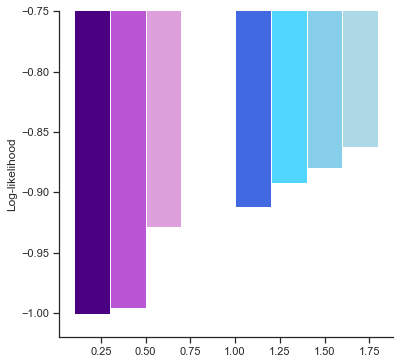

In [140]:
plt.figure(figsize=(6,6))
width = 0.2
b=6
c=4.5

(81/255, 214/255, 255/255)

# plt.bar(width*1,np.mean(nhb_ru_c)/150,width=width,color='dimgray')
plt.bar(width*(1),np.mean(nhb_ru_no_gamma_no_persev_no_phi)/150,width=width,color='indigo')
plt.bar(width*(2),np.mean(nhb_ru_no_gamma_no_persev)/150,width=width,color='mediumorchid')
plt.bar(width*(3),np.mean(nhb_ru_no_gamma)/150,width=width,color='plum')

plt.bar(width*(c+1),np.mean(nhb_glm_ru_no_gamma_beta_sqrt)/150,width=width,color='royalblue')
plt.bar(width*(c+2),np.mean(nhb_glm_ru_no_gamma_phi_sqrt)/150,width=width,color=(81/255, 214/255, 255/255))
plt.bar(width*(c+3),np.mean(nhb_glm_ru_no_gamma_persev_sqrt)/150,width=width,color='skyblue')
plt.bar(width*(c+4),np.mean(nhb_glm_ru_no_gamma_sqrt)/150,width=width,color='lightblue')
# plt.bar(width*(c+5),np.mean(nhb_glm_ru_c_vep)/150,width=width,color='lightcyan',label='GLM:DUP')

plt.ylim(-1.02,-0.75)


plt.ylabel('Log-likelihood')
sns.set(style='ticks')
sns.despine()
plt.show()

In [44]:
beta_a,beta,_,persev = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_beta_sqrt.csv')
phi_a,_,phi,_ = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_phi_sqrt.csv')
persev_a,_,_,persev = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_persev_sqrt.csv')

beta_norm = np.divide(beta_a,beta)
phi_norm = np.divide(phi_a,phi)
persev_norm = np.divide(persev_a,persev)

data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a,
        'beta_norm':beta_norm,'phi_norm':phi_norm,'persev_norm':persev_norm}
df = pd.DataFrame(data)

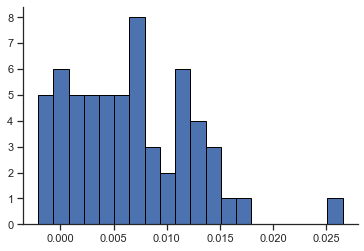

In [28]:
plt.hist(beta_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

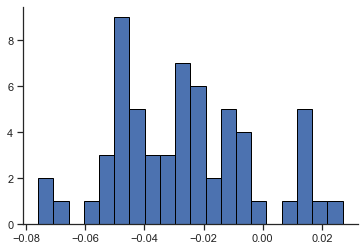

In [29]:
plt.hist(phi_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

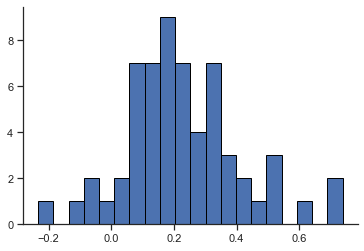

In [30]:
plt.hist(persev_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

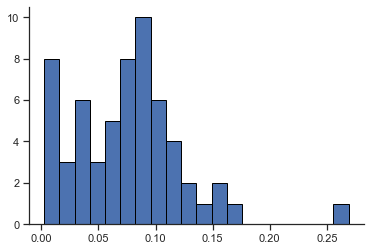

In [31]:
plt.hist(beta,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

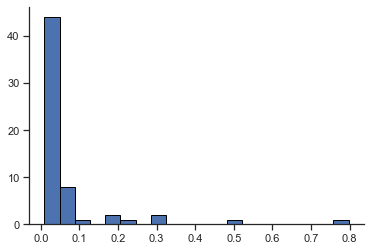

In [32]:
plt.hist(phi,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

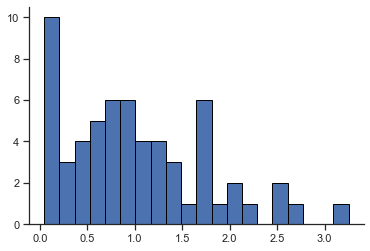

In [33]:
plt.hist(persev,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

In [15]:
print(np.arange(1,26))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [12]:
t_statistic, p_value = stats.ttest_1samp(beta_norm, 0)
print(p_value)

2.3816722728111004e-05


In [13]:
t_statistic, p_value = stats.ttest_1samp(phi_norm, 0)
print(p_value)

5.662114935378665e-10


In [11]:
t_statistic, p_value = stats.ttest_1samp(persev_norm, 0)
print(p_value)

6.748466372806501e-07


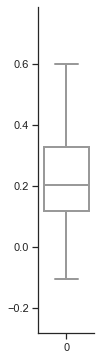

In [139]:
x = (np.random.random((60))-np.ones((60))*0.5)*0.8
plt.figure(figsize=(1,6))
sns.boxplot(data=df["persev_a"],linewidth=2,fliersize=0,color='white')

sns.set(style='ticks')
sns.despine()

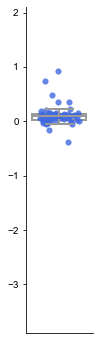

In [9]:
x = (np.random.random((60))-np.ones((60))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["beta_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,beta_norm,s=30,color='royalblue',linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-3.9,2.1])
sns.set(style='ticks')
sns.despine()

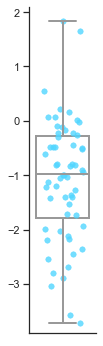

In [153]:
x = (np.random.random((60))-np.ones((60))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["phi_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,phi_norm,s=30,color=(81/255, 214/255, 255/255),linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-3.9,2.1])
sns.set(style='ticks')
sns.despine()

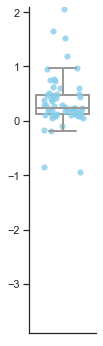

In [155]:
x = (np.random.random((60))-np.ones((60))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["persev_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,persev_norm,s=30,color='skyblue',linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-3.9,2.1])
sns.set(style='ticks')
sns.despine()

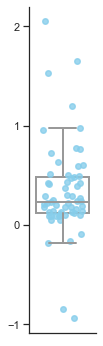

In [125]:
x = (np.random.random((60))-np.ones((60))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["persev_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,persev_norm,s=30,color='skyblue',linewidths=1.5,alpha=0.8)
# plt.yticks([-0.4,0.0,0.4,0.8])
plt.xticks([])
sns.set(style='ticks')
sns.despine()

<AxesSubplot:>

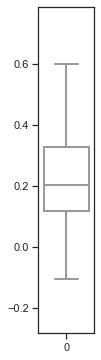

In [130]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["persev_a"],linewidth=2,fliersize=0,color='white')


In [18]:
print(np.mean(nhb_glm_ru_no_gamma_sqrt[0:46]))
print(np.mean(nhb_glm2_ru_no_gamma_sqrt[0:46]))

-122.70070545689495
-119.28738765388849


In [8]:
print(np.mean(nhb_glm_ru_no_gamma))

-123.0847824653359


In [13]:
nhb_glm2_ru_c = log_likelyhood_nhb_glm2_ru_c('./nhb_glm2_ru_c.csv')

In [14]:
print(np.mean(nhb_glm2_ru_c))

-119.56670464959967


In [17]:
beta_a,phi_a,persev_a,beta,phi,persev = read_parameter_glm_3_para('./nhb_glm_ru_no_gamma_sqrt.csv')

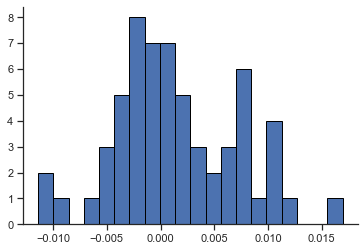

In [18]:
plt.hist(beta_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

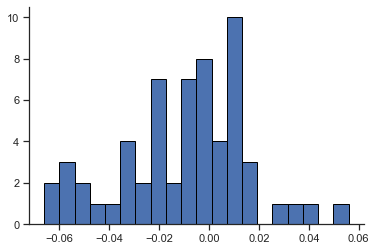

In [19]:
plt.hist(phi_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

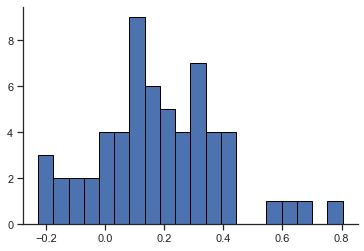

In [20]:
plt.hist(persev_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

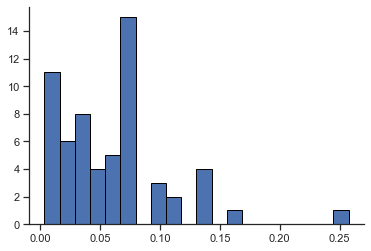

In [22]:
plt.hist(beta,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

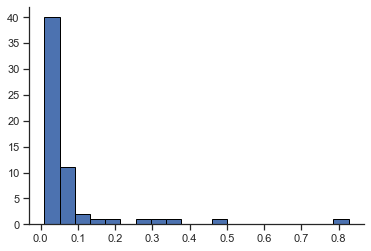

In [23]:
plt.hist(phi,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

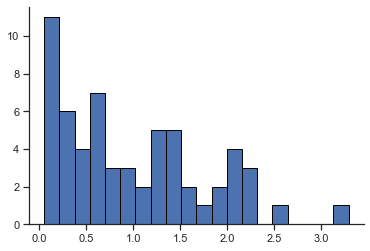

In [24]:
plt.hist(persev,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

In [9]:
def read_data_all_reward(n):
    #read behavioral data; no action: action[i]=4
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    comparision = [] #r-r_b; 1:>=0, 0:<0
    reward_all = []
    
    subject = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,49,
               51,52,53,55,56,58,59,
               61]
    
    num = str(100+subject[n])
    file = pd.read_csv('E:/multi-bandit/RL_E1_preexp1_alldata/' + num + '.csv')
    name = 'sub (' +str(n) +').csv'
    action_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    for i in range((file.shape[0])):

        if file.iloc[i,0] == 1 and file.iloc[i,action_index]!='None' :
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            reward_all.append([int(file.iloc[i,reward_index-4]),int(file.iloc[i,reward_index-3]),int(file.iloc[i,reward_index-2]),int(file.iloc[i,reward_index-1])])
            if int(file.iloc[i,reward_index]) >= int(file.iloc[i,reward_index+1]):
                comparision.append(1)
            else:
                comparision.append(0)
        elif file.iloc[i,0] == 1 and file.iloc[i,action_index] =='None' :
            action.append(4)
            reward.append(0)
            reward_B.append(0)
            comparision.append(0)
            reward_all.append([0,0,0,0])
    return action,reward,reward_B,comparision,reward_all
def best_choice():
    subjects = 46
    trials = 150
    Comparison_1_best = []
    Comparison_0_best = []
    Best = []
    for s in range(subjects):
        comparison_0 = 0
        comparison_1 = 0
        comparison_0_best = 0
        comparison_1_best = 0
        effictive_trial = 0
        best = 0
        action,reward,reward_B,comparison,reward_all =read_data_all_reward(s+1) 
        comparison = rewards2comparison(action,reward,reward_B,0)
        for t in range(trials):
            if action[t] != 4 :
                if comparison[t] >= 0:
                    comparison_1 += 1
                    if reward[t] == max(reward_all[t]):
                        comparison_1_best += 1
                elif comparison[t] < 0:
                    comparison_0 += 1
                    if reward[t] == max(reward_all[t]):
                        comparison_0_best += 1
                else:
                    print('ERROR')
                effictive_trial += 1
                if reward[t+1] == max(reward_all[t+1]):
                    best +=1
        Comparison_0_best.append(comparison_0_best/comparison_0)
        Comparison_1_best.append(comparison_1_best/comparison_1)
        Best.append(best/effictive_trial)
    return Comparison_1_best,Comparison_0_best,Best

def optimal_suboptimal_transition():
    subjects = 46
    trials = 150
    Comparison_1_transition = []
    Comparison_0_transition = []
    Best_transition = []
    for s in range(subjects):
        comparison_0 = 0
        comparison_1 = 0
        comparison_0_best = 0
        comparison_1_best = 0
        effictive_trial = 0
        best = 0
        action,reward,reward_B,comparison,reward_all =read_data_all_reward(s+1) 
        comparison = rewards2comparison(action,reward,reward_B,0)
        for t in range(trials):
            if action[t] != 4 and action[t+1] !=4:
                if comparison[t] >= 0:
                    comparison_1 += 1
                    if reward[t+1] == max(reward_all[t+1]):
                        comparison_1_best += 1
                elif comparison[t] < 0:
                    comparison_0 += 1
                    if reward[t+1] == max(reward_all[t+1]):
                        comparison_0_best += 1
                else:
                    print('ERROR')
                effictive_trial += 1
                if reward[t+1] == max(reward_all[t+1]):
                    best +=1
        Comparison_0_best.append(comparison_0_best/comparison_0)
        Comparison_1_best.append(comparison_1_best/comparison_1)
        Best.append(best/effictive_trial)
    return Comparison_1_best,Comparison_0_best,Best

In [116]:
Comparison_1_best,Comparison_0_best,Best = best_choice()

In [124]:
Best = np.array(Best)
print(np.mean(Best))
print(len(Best))
print(np.mean(Comparison_1_best))
print(np.mean(Comparison_0_best))

0.529095258421414
46
0.6023464541094777
0.3941517601249185


In [125]:
for i in range(len(Best)):
    if Best[i]<0.3:
        print('subject: ',i+1,' the radio of choosing the best arm: ',Best[i])

subject:  21  the radio of choosing the best arm:  0.20408163265306123
subject:  33  the radio of choosing the best arm:  0.24324324324324326
subject:  36  the radio of choosing the best arm:  0.17687074829931973
subject:  42  the radio of choosing the best arm:  0.2777777777777778


In [156]:
plt.figure(figsize=(6,6))
sns.set()
plt.scatter(np.zeros((46)),Comparison_0_best,s=5)
plt.scatter(np.ones((46)),Comparison_1_best,s=5)
plt.scatter(np.ones((46))*0.5,Best,s=5)
for i in range(46):
    plt.plot([0,0.5],[Comparison_0_best[i],Best[i]],c='grey',alpha=0.25)
    plt.plot([0.5,1],[Best[i],Comparison_1_best[i]],c='grey',alpha=0.25)
for i in range(len(Best)):
    if Best[i]<0.3:
        print('subject: ',i+1,' the radio of choosing the best arm: ',Best[i])

NameError: name 'Comparison_0_best' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:
nhb_test_var = log_likelyhood_nhb_test_var('./nhb_bayesian_learning_pystan_all.csv')

In [10]:
def log_likelyhood_nhb_happiness_test(file_name):#nhb
    beta,phi,persev,gamma,comparison_level = read_parameter_happiness(file_name)
    # print(np.mean(beta))
    # print(np.mean(phi))
    # print(np.mean(persev))
    # print(np.mean(gamma))
    # print(np.mean(comparison_level))
    subjects = 46
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = []
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                happiness = v + comparison_level[s] * np.ones((4)) *comparision[t]
                # print(happiness-v)
                # print(action_probability((beta[s]*happiness+eb+pb+re),action[t]))
                loglikelyhood.append(action_probability((beta[s]*happiness+eb+pb+re),action[t]))
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))                
                # print(v)
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood
def log_likelyhood_nhb_test(file_name):#nhb
    beta,phi,persev,gamma = read_parameter(file_name)
    print(np.mean(beta))
    print(np.mean(phi))
    print(np.mean(persev))
    print(np.mean(gamma))
    subjects = 46
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = []
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = phi[s] * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood.append(action_probability((beta[s]*v+eb+pb+re),action[t]))
                # print(action_probability((beta[s]*v+eb+pb+re),action[t]))
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
                # print(v)
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_phi_test(file_name):#nhb
    beta,phi,persev,gamma,phi_a = read_parameter_glm_para(file_name)
    subjects = 46
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                eb = (phi_a[s]* comparision[t] + phi[s]) * sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                print(action_probability((beta[s]*v+eb+pb+re),action[t]))
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
                
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_phi_test(file_name):#nhb
    beta,phi,persev,gamma,phi_a = read_parameter_glm_para(file_name)
    subjects = 46
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.min(sig)
                re_sig = sig - np.ones((4))*min_sig
                eb = (phi_a[s]* comparision[t] + phi[s]) * re_sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                print(action_probability((beta[s]*v+eb+pb+re),action[t]))
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
            
        
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

In [51]:
def log_likelyhood2BIC(k,l):
    trial_num = 150
    return (k*np.log(trial_num)-2*l)

In [52]:
print(log_likelyhood2BIC(4,np.mean(nhb_ru)))
print(log_likelyhood2BIC(8,np.mean(nhb_glm_verp)))

287.8461756910335
284.78495983891975


In [63]:
nhb_glm_c_gamma = log_likelyhood_nhb_glm_c_gamma('./nhb_glm_c_gamma.csv')

In [64]:
print(np.mean(nhb_glm_c_gamma))

-133.4779617248545


In [60]:
nhb_c = log_likelyhood_nhb_c('./nhb_comparison_c.csv')

In [61]:
print(np.mean(nhb_c))

-133.47826648426243


In [23]:
nhb_ru = log_likelyhood_relative_uncertainty('./nhb_comparison_ru.csv')

In [28]:
nhb_glm_ru_c = log_likelyhood_nhb_glm_ru_c('./nhb_glm_ru_c.csv')

In [65]:
nhb_glm_ru_phi = log_likelyhood_nhb_glm_phi('./nhb_glm_ru_phi.csv')
print(np.mean(nhb_glm_ru_phi))

-128.1237899453649


In [46]:
nhb_glm_beta = log_likelyhood_nhb_glm_beta('./nhb_comparison_glm_beta.csv')
nhb_glm_phi = log_likelyhood_nhb_glm_phi('./nhb_comparison_glm_phi.csv')
nhb_glm_persev = log_likelyhood_nhb_glm_persev('./nhb_comparison_glm_persev.csv')
nhb_glm_gamma = log_likelyhood_nhb_glm_gamma('./nhb_comparison_glm_gamma.csv')

In [47]:
print(np.mean(nhb_glm_beta))
print(np.mean(nhb_glm_phi))
print(np.mean(nhb_glm_persev))
print(np.mean(nhb_glm_gamma))

-131.69299229000669
-128.1252367860457
-126.39184384968884
-132.118041394749


In [39]:
nhb_glm_verp = log_likelyhood_nhb_glm('./nhb_glm_verp.csv')

In [40]:
print(np.mean(nhb_glm_verp))

-122.34993874307486


In [41]:
print(np.mean(nhb_glm))
print(np.mean(nhb_glm_verp))

-122.3476191154043
-122.34993874307486


In [42]:
nhb_glm_vep = log_likelyhood_nhb_glm_vep('./nhb_glm_vep.csv')

In [43]:
print(np.mean(nhb_glm_vep))

-123.08640803656351


In [54]:
nhb_glm = log_likelyhood_nhb_glm('./nhb_comparison_glm_all.csv')
nhb_glm_verp = log_likelyhood_nhb_glm('./nhb_glm_verp.csv')
nhb_glm_ver = log_likelyhood_nhb_glm_ver('./nhb_glm_ver.csv')
nhb_glm_vep = log_likelyhood_nhb_glm_vep('./nhb_glm_vep.csv')
nhb_glm_vrp = log_likelyhood_nhb_glm_vrp('./nhb_glm_vrp.csv')

In [55]:
print(np.mean(nhb_glm))
print(np.mean(nhb_glm_verp))
print(np.mean(nhb_glm_ver))
print(np.mean(nhb_glm_vep))
print(np.mean(nhb_glm_vrp))

-122.3476191154043
-122.34993874307486
-133.3039704033845
-123.08640803656351
-124.40019687078927


In [24]:
nhb = log_likelyhood_nhb('./formal_contrast_0.csv')
nhb_verp = log_likelyhood_nhb('./nhb_comparison_verp.csv')
nhb_ver = log_likelyhood_ver('./nhb_comparison_ver.csv')
nhb_vep = log_likelyhood_vep('./nhb_comparison_vep.csv')
nhb_vrp = log_likelyhood_vrp('./nhb_comparison_vrp.csv')

In [27]:
print(np.mean(nhb_ru))
print(np.mean(nhb_verp))

-133.90181725732424
-133.9014659801071


In [25]:
print(np.mean(nhb_ru))
print(np.mean(nhb_verp))
print(np.mean(nhb_ver))
print(np.mean(nhb_vep))
print(np.mean(nhb_vrp))

-133.90181725732424
-133.9014659801071
-145.4206514576241
-133.47830143108388
-134.38317280465756


([<matplotlib.axis.XTick at 0x2104396d898>,
 [Text(0, 0, 'VERP'), Text(1, 0, 'VER'), Text(2, 0, 'VEP'), Text(3, 0, 'VRP')])

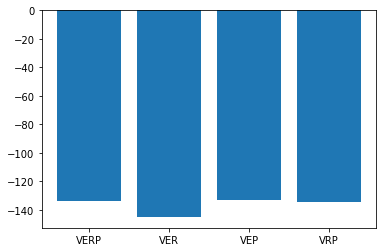

In [14]:
plt.bar(range(4),[np.mean(nhb_verp),np.mean(nhb_ver),np.mean(nhb_vep),np.mean(nhb_vrp)])
plt.xticks(range(4),['VERP','VER','VEP','VRP'])

In [36]:
nhb_happiness_test = log_likelyhood_nhb_happiness_test('./nhb_happiness_0_bayesian_learning_pystan_all.csv')

In [37]:
nhb_test = log_likelyhood_nhb_test('./nhb_bayesian_learning_pystan_all.csv')

0.05566974045177457
0.05165880564580469
0.9653253539016652
0.7492516652475784


In [65]:
nhb_test = log_likelyhood_nhb_test('./nhb_bayesian_learning_pystan_all.csv')
nnhb_test = log_likelyhood_nhb_test('./nhb_bayesian_learning_pystan_all.csv')
nhb_happiness_test = log_likelyhood_nhb_happiness_test('./nhb_happiness_0_bayesian_learning_pystan_all.csv')

In [ ]:
print(nhb_test[0])
print(nhb_happiness_test[0])

In [ ]:
print(nhb_test[0])
print(nnhb_test[0])

In [11]:
def exploration_exploitation():
    subjects = 60
    trials = 150
    Exploration_1 = []
    Exploration_0 = []
    Total = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        exploration_1 = 0
        exploration_0 = 0
        total = 0
        total_exploration = 0
        num_1 = 0
        num_0 = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                total += 1
                if not v[action[t]]==np.max(v):
                    total_exploration += 1
                if comparision[t]>=0:
                    num_1 += 1
                    if not v[action[t]]==np.max(v):
                        exploration_1+=1
                else:
                    num_0 += 1
                    if not v[action[t]]==np.max(v):
                        exploration_0+=1
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        Exploration_0.append(exploration_0/num_0)
        Exploration_1.append(exploration_1/num_1)
        Total.append(total_exploration/total)

    return Exploration_0,Exploration_1,Total

def exploration_exploitation_ru_c():
    subjects = 60
    trials = 150
    Exploration_1 = []
    Exploration_0 = []
    Total = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(s) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        exploration_1 = 0
        exploration_0 = 0
        total = 0
        total_exploration = 0
        num_1 = 0
        num_0 = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                total += 1
                if not v[action[t]]==np.max(v):
                    total_exploration += 1
                if comparision[t]>=0:
                    num_1 += 1
                    if not v[action[t]]==np.max(v):
                        exploration_1+=1
                else:
                    num_0 += 1
                    if not v[action[t]]==np.max(v):
                        exploration_0+=1
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        Exploration_0.append(exploration_0/num_0)
        Exploration_1.append(exploration_1/num_1)
        Total.append(total_exploration/total)

    return Exploration_0,Exploration_1,Total


In [9]:
def get_p_value(arrA, arrB):
  a = np.array(arrA)
  b = np.array(arrB)
  t, p = stats.ttest_ind(a,b)
  return p

<Figure size 432x288 with 0 Axes>

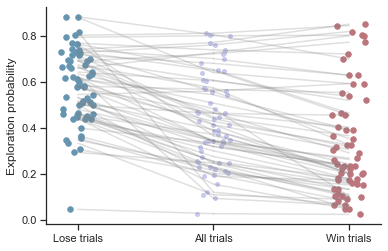

In [157]:
Exploration_0,Exploration_1,Total = exploration_exploitation()
sns.set(style='ticks')
sns.despine()
plt.figure(figsize=(6,4))
x0 = 1
x1 = 2
x2 = 3
x_lose = (np.random.random((60))-0.5)*0.25+np.ones((60))*x0
x_win = (np.random.random((60))-0.5)*0.25+np.ones((60))*x2
x = (np.random.random((60))-0.5)*0.25+np.ones((60))*x1
plt.scatter(x_lose,Exploration_0,s=30,color=(102/255,149/255,177/255))
plt.scatter(x,Total,s=15,color=(198/255, 200/255, 238/255))
plt.scatter(x_win,Exploration_1,s=30,color=(188/255,117/255,125/255))

# plt.scatter(np.zeros((60)),Exploration_0,s=15,color=(102/255,149/255,177/255))
# plt.scatter(np.ones((60)),Exploration_1,s=15,color=(188/255,117/255,125/255))
# plt.scatter(np.ones((60))*0.5,Total,s=5,color='lightgreen')

plt.xticks([x0,x1,x2],['Lose trials','All trials','Win trials'])
plt.ylabel('Exploration probability')
for i in range(60):
    plt.plot([x0,x1],[Exploration_0[i],Total[i]],c='grey',alpha=0.25)
    plt.plot([x1,x2],[Total[i],Exploration_1[i]],c='grey',alpha=0.25)
# print(get_p_value(Exploration_0,Exploration_1))
# for i in range(len(Total)):
#     if Total[i]<0.1:
#         print('subject: ',i+1,' the radio of exploration: ',Total[i])
Total = np.array(Total)
# print(np.mean(Total))
sns.despine()
plt.show()

In [158]:
print(get_p_value(Exploration_0,Exploration_1))

1.5740130895465308e-09


In [33]:
decaypara=0.9836
decaycenter=50
trial_num = 150
arm_reward_distribution = [[],[],[],[]]
B_start = [random.uniform(25,45) ,random.uniform(35,55) ,random.uniform(45,65) ,random.uniform(55,75)]
B_0 = B_start[0]
B_1 = B_start[1]
B_2 = B_start[2]
B_3 = B_start[3]
for i in range(trial_num):
    arm_reward_distribution[0].append(B_0)
    arm_reward_distribution[1].append(B_1)
    arm_reward_distribution[2].append(B_2)
    arm_reward_distribution[3].append(B_3)
    B_0 = B_start[0]*decaypara+(1-decaypara)*decaycenter + np.random.normal(0,2.8,1)
    B_1 = B_start[1]*decaypara+(1-decaypara)*decaycenter + np.random.normal(0,2.8,1)
    B_2 = B_start[2]*decaypara+(1-decaypara)*decaycenter + np.random.normal(0,2.8,1)
    B_3 = B_start[3]*decaypara+(1-decaypara)*decaycenter + np.random.normal(0,2.8,1)
    B_start = [B_0,B_1,B_2,B_3]

In [ ]:
96, 211, 148

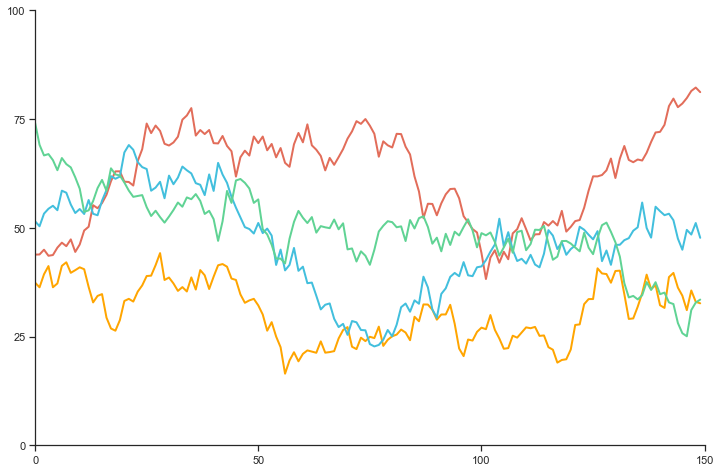

In [36]:
plt.figure(figsize=(12,8))
sns.set(style='ticks')
x = range(150)
plt.plot(x,arm_reward_distribution[0],linewidth=2,c='orange')
plt.plot(x,arm_reward_distribution[1],linewidth=2,c=(226/255, 109/255, 90/255))
plt.plot(x,arm_reward_distribution[2],linewidth=2,c=(66/255, 191/255, 221/255))
plt.plot(x,arm_reward_distribution[3],linewidth=2,c=(96/255, 211/255, 148/255))
plt.ylim(0,100)
plt.yticks([0,25,50,75,100])
plt.xlim(0,150)
plt.xticks([0,50,100,150])
sns.despine()
plt.show()

In [45]:
nhb_delta = log_likelyhood_nhb_delta('./nhb_0_delta.csv')

In [13]:
# elife = log_likelyhood_elife('./comparision_0_bayesian_learning_pystan.csv')
nhb = log_likelyhood_nhb('./nhb_bayesian_learning_pystan_all.csv')
nhb_glm = log_likelyhood_nhb_glm('./nhb_comparison_glm_all.csv')

In [12]:
nhb_glm_decay = log_likelyhood_nhb_glm_decay('./nhb_comparison_glm_decay_all.csv')

In [23]:
elife = np.array(elife)
nhb = np.array(nhb)
print(np.mean(elife))
print(np.mean(nhb))

-158.66087243661465
-156.71416642037485


In [46]:
nhb_happiness = np.array(nhb_happiness)
nhb = np.array(nhb)
nhb_delta = np.array(nhb_delta)
nhb_glm = np.array(nhb_glm)
nhb_glm_decay = np.array(nhb_glm_decay)
nhb_learning = np.array(nhb_learning)
print(np.mean(nhb))
print(np.mean(nhb_delta))
print(np.mean(nhb_glm))
print(np.mean(nhb_glm_decay))
print(np.mean(nhb_happiness))
print(np.mean(nhb_learning))

-133.9025632204292
-175.90443439901156
-122.3476191154043
-125.29592522524611
-133.90199405219408
-129.29195117531808


In [28]:
E = 0
N = 0
for i in range(subject_num):
    if nhb_happiness[i]>nhb[i]:
        E+=1
    else:
        N+=1
print(E)
print(N)

5
5


In [14]:
nhb_glm = log_likelyhood_nhb_glm('./nhb_comparison_glm_all.csv')
nhb_happiness = log_likelyhood_nhb_happiness('./nhb_happiness_0_bayesian_learning_pystan_all.csv')
nhb_learning = log_likelyhood_nhb_learning('./nhb_learning_0_bayesian_learning_pystan_all.csv')

In [19]:
beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b,phi_b,persev_b,gamma_b = read_parameter_glm2('./nhb_glm2_ru_c.csv')
data = {'beta_a_0':beta_a_0,'phi_a_0':phi_a_0,'persev_a_0':persev_a_0,'gamma_a_0':gamma_a_0,
        'beta_a_1':beta_a_1,'phi_a_1':phi_a_1,'persev_a_1':persev_a_1,'gamma_a_1':gamma_a_1,
        'beta_b':beta_b,'phi_b':phi_b,'persev_b':persev_b,'gamma_b':gamma_b,
        }
df = pd.DataFrame(data)

<AxesSubplot:>

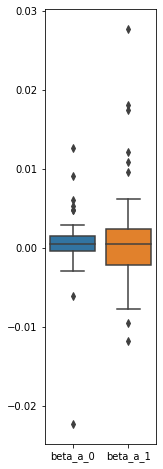

In [31]:
condition = []
for i in range(46):
    condition.append('beta_a_0')
for i in range(46):
    condition.append('beta_a_1')
data = {"value":np.array([beta_a_0,beta_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

<AxesSubplot:>

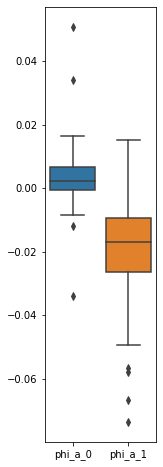

In [32]:
condition = []
for i in range(46):
    condition.append('phi_a_0')
for i in range(46):
    condition.append('phi_a_1')
data = {"value":np.array([phi_a_0,phi_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

<AxesSubplot:>

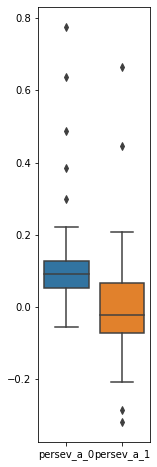

In [33]:
condition = []
for i in range(46):
    condition.append('persev_a_0')
for i in range(46):
    condition.append('persev_a_1')
data = {"value":np.array([persev_a_0,persev_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

<AxesSubplot:>

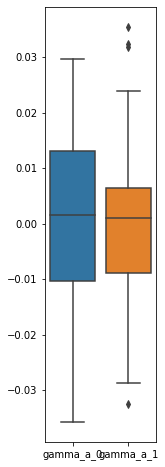

In [34]:
condition = []
for i in range(46):
    condition.append('gamma_a_0')
for i in range(46):
    condition.append('gamma_a_1')
data = {"value":np.array([gamma_a_0,gamma_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

In [5]:
beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b,gamma_b = read_parameter_glm('./nhb_glm_ru_c.csv')
data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a,'gamma_a':gamma_a,
        'beta_b':beta_b,'phi_b':phi_b,'persev_b':persev_b,'gamma_b':gamma_b,
        }
df = pd.DataFrame(data)


In [58]:
print(np.mean(beta_a/beta_b))
print(np.mean(phi_a/phi_b))

0.21254376868273542
-0.10083189159404872


In [60]:
beta,_,_,_,beta_a = read_parameter_happiness('./nhb_glm_ru_c_beta.csv')
_,phi,_,_,phi_a = read_parameter_happiness('./nhb_glm_ru_c_phi.csv')
_,_,persev,_,persev_a = read_parameter_happiness('./nhb_glm_ru_c_persev.csv')
_,_,_,gamma,gamma_a = read_parameter_happiness('./nhb_glm_ru_c_gamma.csv')
beta_norm = np.divide(beta_a,beta)
phi_norm = np.divide(phi_a,phi)
persev_norm = np.divide(persev_a,persev)
gamma_norm = np.divide(gamma_a,gamma)
data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a,'gamma_a':gamma_a,
        'beta_norm':beta_norm,'phi_norm':phi_norm,'persev_norm':persev_norm,'gamma_norm':gamma_norm}
df = pd.DataFrame(data)

In [61]:
print(np.mean(phi_a)/np.mean(phi))
print(np.mean(beta_a)/np.mean(beta))
print(np.mean(persev_a)/np.mean(persev))
print(np.mean(gamma_a)/np.mean(gamma))

-0.1279911076503209
0.015231663142825808
0.05379461024414886
0.0007875969675198256


<AxesSubplot:>

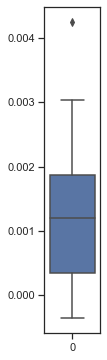

In [62]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["beta_a"])

<AxesSubplot:>

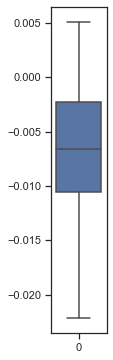

In [63]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["phi_a"])

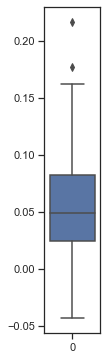

In [64]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["persev_a"]);

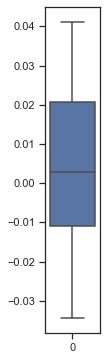

In [65]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["gamma_a"]);

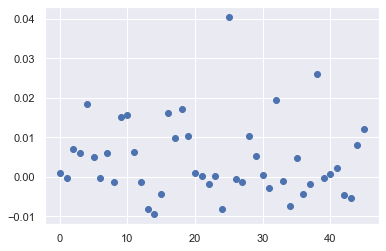

In [60]:
plt.scatter(np.arange(subject_num),beta_a)
sns.regplot(x='beta',y='beta_1' ,data=df,color='blue')

In [ ]:
#参数对于每个人的一致性

#直接用模型计算出每个回合探索与利用的概率